# <CENTER>REDDIT SENTIMENT ANALYSIS: EXPLORING THE FOOTBALL WORLD THROUGH COMMENTS</CENTER>

# INITIALIZING REDDIT INSTANCE FOR DATA SCRAPING

Initialized a Reddit instance using the PRAW (Python Reddit API Wrapper) library. It sets up authentication credentials and creates a Reddit instance with a specified user agent. The user agent is a string that identifies the application making the Reddit API requests. In this case, it's set to "Reddit_Scrapper 1.0 by /u/FeatureChoice5036".

In [1]:
import praw
import pandas as pd

# Initialize Reddit instance
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

# FETCHING RISING POSTS ON MESSI

This fetches rising posts related to Lionel Messi from the subreddit "messi" using the PRAW library. It iterates over each submission, printing various information about the submission, such as its title, ID, author, creation time in UTC, score, upvote ratio, and URL. Additionally, it adds the title of each submission to a set to keep track of unique headlines. Finally, it prints the number of unique headlines fetched from the subreddit.

In [2]:
# Initialize an empty set to store unique headlines
headlines = set()

# Fetch rising posts related to Messi
for submission in reddit.subreddit("messi").rising(limit=None):
    # Print information about the submission
    print("Title:", submission.title)
    print("ID:", submission.id)
    print("Author:", submission.author)
    print("Created UTC:", submission.created_utc)
    print("Score:", submission.score)
    print("Upvote Ratio:", submission.upvote_ratio)
    print("URL:", submission.url)
    
    # Add the title to the set of headlines
    headlines.add(submission.title)

# Print the number of unique headlines fetched
print("Number of unique headlines:", len(headlines))


Title: Lionel Messi - The Argentine | 🇦🇷 Short Film
ID: 1bjnlyt
Author: in_famous9
Created UTC: 1710966800.0
Score: 13
Upvote Ratio: 1.0
URL: https://youtu.be/kLKe11myZT8?si=kWUxVaHA5RRESatr
Title: Lionel Messi suffers fresh injury blow as Argentina make decision on Inter Miami star
ID: 1bipqqt
Author: arealdisneyprincess
Created UTC: 1710868873.0
Score: 37
Upvote Ratio: 0.78
URL: https://www.themirror.com/sport/soccer/lionel-messi-inter-miami-soccer-395764
Number of unique headlines: 2


# TEXT PREPROCESSING FUNCTION USING NLTK 

Defined a function `preprocess_text()` for text preprocessing. The function takes a piece of text as input and performs the following preprocessing steps:

1. Convert the text to lowercase.
2. Tokenize the text into words.
3. Remove English stopwords using NLTK's stopwords corpus.
4. Lemmatize each word to its base form using NLTK's WordNet lemmatizer.
5. Join the preprocessed words back into a single text string.

This preprocessing function has be applied to text data before conducting further analysis such as sentiment analysis or topic modeling.

In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# PERFORMING SENTIMENT ANALYSIS USING VADER SENTIMENT ANALYZER

This fetches comments from various posts related to Lionel Messi from the subreddit "messi" using the PRAW library. It retrieves up to 1000 comments and preprocesses them using the `preprocess_text()` function defined earlier. Then, it initializes the VADER sentiment analyzer and calculates sentiment scores (compound scores) for each preprocessed comment. Finally, it creates a pandas DataFrame to store the preprocessed comments along with their sentiment scores and displays the DataFrame.

In [4]:
# Fetch comments from various posts related to Messi
messi_comments = []
for submission in reddit.subreddit("messi").comments(limit=1000):
    messi_comments.append(submission.body)

# Preprocess comments
preprocessed_comments = [preprocess_text(comment) for comment in messi_comments]

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on preprocessed comments
sentiment_scores = [sid.polarity_scores(comment)['compound'] for comment in preprocessed_comments]

# Create a dataframe to store preprocessed comments and sentiment scores
messi_df = pd.DataFrame({'Comment': preprocessed_comments, 'Sentiment Score': sentiment_scores})

# Display the dataframe
print(messi_df)

                                               Comment  Sentiment Score
0    mandemmemesuk , submission removed minimum req...           0.6808
1    awaz_qadir_007 , submission removed minimum re...           0.6808
2    dulcegalia , submission removed minimum requir...           0.6808
3    antique-appeal-1214 , submission removed minim...           0.6808
4    prxyxnshu , submission removed minimum require...           0.6808
..                                                 ...              ...
961  pretend-professor-91 , submission removed mini...           0.6808
962  youknowdem , submission removed minimum requir...           0.6808
963  asleep-ad-8451 , submission removed minimum re...           0.6808
964  fast-woodpecker2616 , submission removed minim...           0.6808
965  aeronews , submission removed minimum required...           0.6808

[966 rows x 2 columns]


# SCORING SENTIMENTS FOR MESSI

Calculates the overall sentiment based on the total sentiment score obtained from the comments related to Lionel Messi. It sums up all the sentiment scores calculated earlier and then determines whether the overall sentiment is positive, negative, or neutral based on the total sentiment score. Finally, it prints or displays the overall sentiment and the total sentiment score.

In [5]:
# Sum all the sentiment scores from the comments
total_sentiment_score = sum(sentiment_scores)

# Determine the overall sentiment based on the total sentiment score
if total_sentiment_score > 0:
    overall_sentiment = "Positive"
elif total_sentiment_score < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

# Print or display the analysis results
print("Overall Sentiment:", overall_sentiment)
print("Total Sentiment Score:", total_sentiment_score)


Overall Sentiment: Positive
Total Sentiment Score: 321.71379999999925


# FETCHING RISING POSTS ON RONALDO

It is similar to the one for fetching rising posts related to Lionel Messi but is tailored for Cristiano Ronaldo. It iterates over rising posts in the subreddit "ronaldo" using the PRAW library, printing various information about each submission such as its title, ID, author, creation time in UTC, score, upvote ratio, and URL. Additionally, it adds the title of each submission to a set to keep track of unique headlines and then prints the number of unique headlines fetched from the subreddit.

In [6]:
# Initialize an empty set to store unique headlines
headlines = set()

# Fetch rising posts related to ronaldo
for submission in reddit.subreddit("ronaldo").rising(limit=None):
    # Print information about the submission
    print("Title:", submission.title)
    print("ID:", submission.id)
    print("Author:", submission.author)
    print("Created UTC:", submission.created_utc)
    print("Score:", submission.score)
    print("Upvote Ratio:", submission.upvote_ratio)
    print("URL:", submission.url)
    
    # Add the title to the set of headlines
    headlines.add(submission.title)

# Print the number of unique headlines fetched
print("Number of unique headlines:", len(headlines))


Title: Portugal without ronaldo vs portugal with ronaldo. Proof that even the portuguese national team is against ronaldo, they played worse so they could take him out the team, THE SYSTEM IS AGAINST HIM
ID: 1bok9bb
Author: Timblerlins-Potsfan
Created UTC: 1711489859.0
Score: 22
Upvote Ratio: 0.82
URL: https://www.reddit.com/gallery/1bok9bb
Title: Smile if you have never lost a World Cup final
ID: 1bomzda
Author: bigpenisman2001
Created UTC: 1711496295.0
Score: 13
Upvote Ratio: 0.84
URL: https://i.redd.it/wq00qw07lrqc1.jpeg
Title: They’re going to blame goatnaldo for this lose today as if he didn’t carry then to a euros in 2016 where he played and scored in the finals
ID: 1bok80h
Author: Timblerlins-Potsfan
Created UTC: 1711489772.0
Score: 9
Upvote Ratio: 0.91
URL: https://i.redd.it/ncvyrhss1rqc1.jpeg
Title: WE WERENT RIGGED INTERNATIONAL TROPHIES AT 35 ISNT THAT RIGHT GOATNALDOG NATION
ID: 1boi2y8
Author: Timblerlins-Potsfan
Created UTC: 1711484738.0
Score: 5
Upvote Ratio: 0.72
URL: h

# DATA PREPROCESSING FOR RONALDO

It Defines a function `preprocess_text` for text preprocessing using NLTK. It converts text to lowercase, tokenizes it, removes stopwords, lemmatizes words, and joins them back into a single string. The commented-out line suggests applying this function to a DataFrame column named "Comment" to create a new column with preprocessed text.

In [7]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text
#comments['Preprocessed_Text'] = comments['Comment'].apply(preprocess_text)

#  VADER ALGORITHM FOR SENTIMENT ANALYSIS

This fetches comments from various posts related to Cristiano Ronaldo from the subreddit "ronaldo" using PRAW. It then preprocesses the comments by removing stopwords, tokenizing, and lemmatizing each comment. Next, it initializes the VADER sentiment analyzer and applies it to perform sentiment analysis on the preprocessed comments, generating sentiment scores for each comment. Finally, it creates a DataFrame named `ronaldo_df` to store the preprocessed comments along with their corresponding sentiment scores, and prints the DataFrame to display the sentiment analysis results.

In [8]:
# Fetch comments from various posts related to Ronaldo
ronaldo_comments = []
for submission in reddit.subreddit("ronaldo").comments(limit=1000):
    ronaldo_comments.append(submission.body)

# Preprocess comments
preprocessed_comments = [preprocess_text(comment) for comment in ronaldo_comments]

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on preprocessed comments
sentiment_scores = [sid.polarity_scores(comment)['compound'] for comment in preprocessed_comments]

# Create a dataframe to store preprocessed comments and sentiment scores
ronaldo_df = pd.DataFrame({'Comment': preprocessed_comments, 'Sentiment Score': sentiment_scores})

# Display the dataframe
print(ronaldo_df)

                                               Comment  Sentiment Score
0    blew return united pier morgan interview . tol...           0.6597
1    agree , ’ criticise ’ done pitch u , ( except ...           0.9274
2    n't like move saudi either honestly think peop...          -0.6044
3    scoring dived penalty world cup > winning worl...           0.1027
4                        ronaldo never scoring last 16           0.0000
..                                                 ...              ...
973                             ca n't tell 're joking          -0.1695
974  guess type `` ronaldo world cup knockout goal ...           0.6588
975            feel bad . must never seen prime hazard          -0.5423
976               r/cristianoronaldo ronaldo subreddit           0.0000
977  post messi interaction ronaldo ronaldo subredd...          -0.4404

[978 rows x 2 columns]


# SCORING SENTIMENTS FOR RONALDO

This calculates the overall sentiment based on the sum of sentiment scores obtained from the sentiment analysis of comments related to Cristiano Ronaldo. It sums up all the sentiment scores and then determines the overall sentiment based on the total sentiment score. If the total sentiment score is greater than 0, it classifies the overall sentiment as "Positive". If it's less than 0, the overall sentiment is classified as "Negative". Otherwise, if the total sentiment score is 0, the overall sentiment is classified as "Neutral". Finally, it prints out the overall sentiment and the total sentiment score.

In [9]:
# Sum all the sentiment scores from the comments
total_sentiment_score = sum(sentiment_scores)

# Determine the overall sentiment based on the total sentiment score
if total_sentiment_score > 0:
    overall_sentiment = "Positive"
elif total_sentiment_score < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

# Print or display the analysis results
print("Overall Sentiment:", overall_sentiment)
print("Total Sentiment Score:", total_sentiment_score)


Overall Sentiment: Positive
Total Sentiment Score: 108.09089999999982


# SENTIMENT ANALYSIS SUMMARY FOR MESSI AND RONALDO

This code snippet provides a sentiment analysis summary for both Messi and Ronaldo based on the sentiment scores obtained from their respective comments.

- It calculates the total sentiment score by summing up all the sentiment scores from Messi's/ ronaldocomments.
- It computes the average sentiment score by taking the mean of Messi's sentiment scores and rnaldo sentiment scores.
- It determines the overall sentiment as "Positive" if the total sentiment score is greater than 0, "Negative" if it's less than 0, and "Neutral" if it's 0.
Finally, it prints out the sentiment analysis summary for both Messi and Ronaldo, including their total sentiment scores, average sentiment scores, and overall sentiment classifications.

In [10]:
# Sentiment Analysis Summary for Messi
messi_total_sentiment_score = messi_df['Sentiment Score'].sum()
messi_avg_sentiment_score = messi_df['Sentiment Score'].mean()
messi_overall_sentiment = "Positive" if messi_total_sentiment_score > 0 else "Negative" if messi_total_sentiment_score < 0 else "Neutral"

# Print or display the analysis results for Messi
print("Messi Sentiment Analysis Summary:")
print("Total Sentiment Score:", messi_total_sentiment_score)
print("Average Sentiment Score:", messi_avg_sentiment_score)
print("Overall Sentiment:", messi_overall_sentiment)

# Sentiment Analysis Summary for Ronaldo
ronaldo_total_sentiment_score = ronaldo_df['Sentiment Score'].sum()
ronaldo_avg_sentiment_score = ronaldo_df['Sentiment Score'].mean()
ronaldo_overall_sentiment = "Positive" if ronaldo_total_sentiment_score > 0 else "Negative" if ronaldo_total_sentiment_score < 0 else "Neutral"

# Print or display the analysis results for Ronaldo
print("\nRonaldo Sentiment Analysis Summary:")
print("Total Sentiment Score:", ronaldo_total_sentiment_score)
print("Average Sentiment Score:", ronaldo_avg_sentiment_score)
print("Overall Sentiment:", ronaldo_overall_sentiment)


Messi Sentiment Analysis Summary:
Total Sentiment Score: 321.7138
Average Sentiment Score: 0.3330370600414079
Overall Sentiment: Positive

Ronaldo Sentiment Analysis Summary:
Total Sentiment Score: 108.0909
Average Sentiment Score: 0.11052239263803681
Overall Sentiment: Positive


# PLOT OF SENTIMENT SCORE DISTRIBUTIONS FOR MESSI AND RONALDO

This code snippet plots histograms showing the distribution of sentiment scores for both Messi and Ronaldo. 

For Messi and ronaldo:
- It creates a histogram using the sentiment scores stored in the DataFrame `messi_df and ronaldo_df`.
- The histogram is divided into 20 bins to visualize the distribution of sentiment scores.
- The histogram is colored blue, and its transparency is set to 0.7 for better visualization.
- The title of the plot is "Sentiment Scores Distribution for Messi","Sentiment Scores Distribution for Ronaldo", and the x-axis and y-axis are labeled accordingly.

Finally, it displays both histograms side by side using `plt.subplot` and `plt.tight_layout()`, and then shows the plots using `plt.show()`.

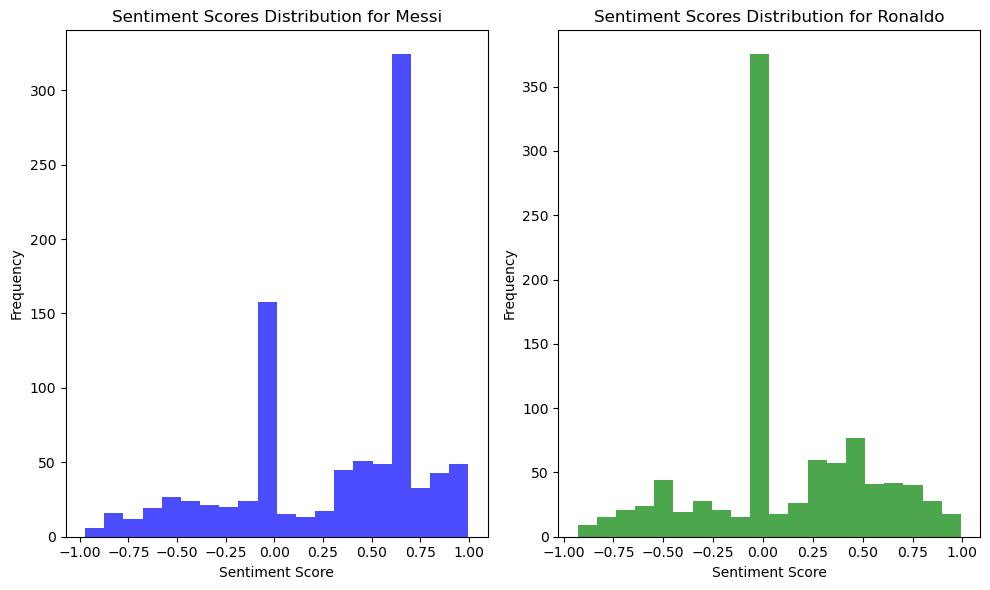

In [11]:
import matplotlib.pyplot as plt

# Plot histograms for Messi and Ronaldo sentiment scores
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(messi_df['Sentiment Score'], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Scores Distribution for Messi')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ronaldo_df['Sentiment Score'], bins=20, color='green', alpha=0.7)
plt.title('Sentiment Scores Distribution for Ronaldo')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# DISTRIBUTION VISUALIZATION

This code snippet plots histograms using seaborn to visualize the distribution of sentiment scores for both Messi and Ronaldo. 

For Messi:
- It creates a histogram using the sentiment scores stored in the DataFrame `messi_df`.
- The histogram includes a kernel density estimation (KDE) curve for a smoother representation of the distribution.
- The plot is styled with a white grid background and uses the color sky blue.
- The title of the plot is "Sentiment Score Distribution for Messi", and the x-axis and y-axis are labeled accordingly.

For Ronaldo:
- Similarly, it creates another histogram using the sentiment scores stored in the DataFrame `ronaldo_df`.
- The histogram includes a KDE curve as well and is colored salmon.
- The title of the plot is "Sentiment Score Distribution for Ronaldo", and the x-axis and y-axis are labeled accordingly.

Finally, it adjusts the layout of the subplots and shows the plots using `plt.show()`.

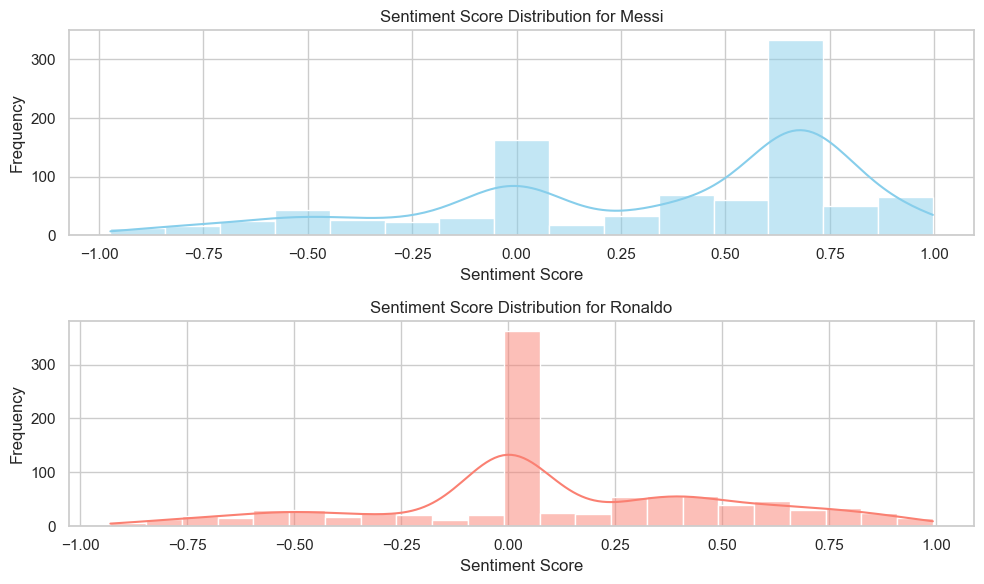

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for Messi and Ronaldo's sentiment scores
plt.figure(figsize=(10, 6))

# Histogram for Messi
plt.subplot(2, 1, 1)
sns.histplot(messi_df['Sentiment Score'], kde=True, color='skyblue')
plt.title('Sentiment Score Distribution for Messi')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for Ronaldo
plt.subplot(2, 1, 2)
sns.histplot(ronaldo_df['Sentiment Score'], kde=True, color='salmon')
plt.title('Sentiment Score Distribution for Ronaldo')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# WORD CLOUD FOR MESSI

It creates a word cloud visualization for Messi's comments using the WordCloud library. It combines all comments into one string, removes common words, and uses a football-shaped mask for the word cloud. The resulting visualization shows the most frequent words in Messi's comments.

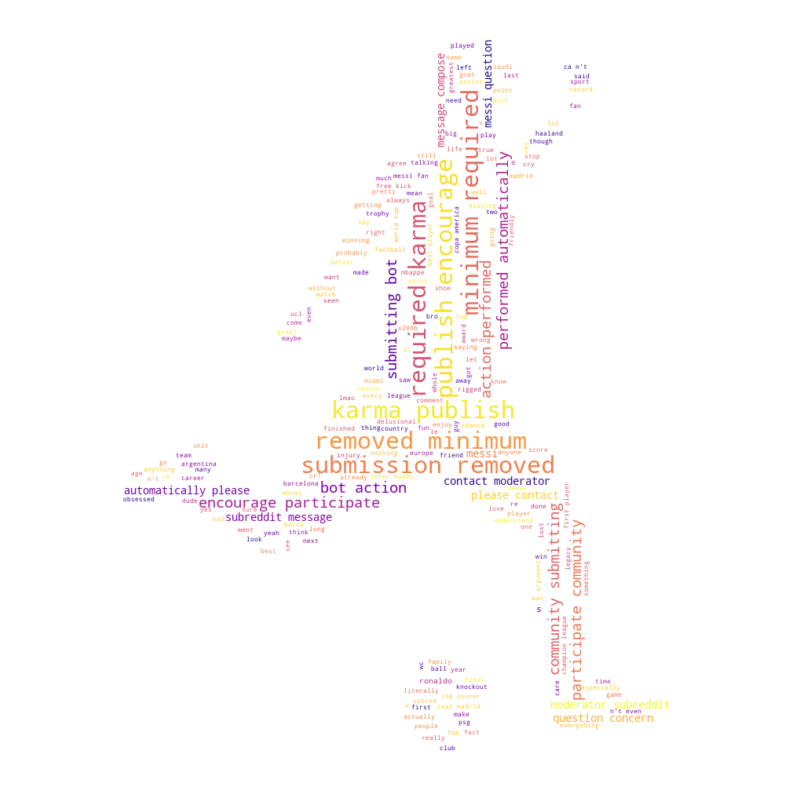

In [13]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image mask
mask = np.array(Image.open("football.jpg"))

# Combine all Messi comments into a single string
messi_comments_combined = ' '.join(messi_df['Comment'])

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=800,
                      max_words=200,
                      stopwords=STOPWORDS,
                      background_color="white",
                      colormap='plasma', 
                      mask=mask).generate(messi_comments_combined)

# Plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# WORDCLOUD FOR RONALDO

It creates a word cloud visualization for Ronaldo's comments using the WordCloud library. It assumes a football-shaped image mask for the word cloud. The resulting visualization displays the most frequent words in Ronaldo's comments.

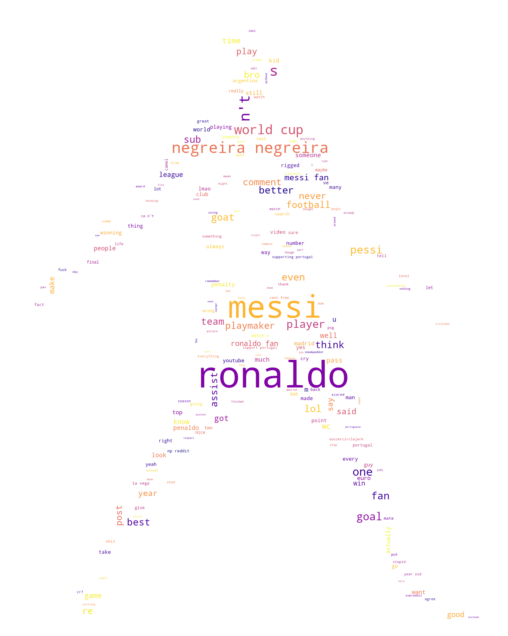

In [14]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image mask for Ronaldo (assuming it's a football-shaped image)
ronaldo_mask = np.array(Image.open("ronaldo.jpg.webp"))
ronaldo_comments_combined = ' '.join(ronaldo_df['Comment'])
# Generate the word cloud for Ronaldo using the custom shape mask
wordcloud_ronaldo = WordCloud(width=1200, height=800,
                              max_words=200,
                              stopwords=STOPWORDS,
                              background_color="white",
                              colormap='plasma', 
                              mask=ronaldo_mask).generate(ronaldo_comments_combined)

# Plot the word cloud for Ronaldo
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_ronaldo, interpolation='bilinear')
plt.axis("off")
plt.show()


# TEXTBLOB ALGORITHM FOR ANALYSING SENTIMENTS

This utilizes TextBlob for sentiment analysis on comments related to Messi and Ronaldo. 
1. **Sentiment Analysis Function**: Defines a function `analyze_sentiment_textblob(text)` that computes the sentiment polarity of the input text using TextBlob.

2. **Analysis on Messi Comments**: Applies TextBlob sentiment analysis to comments about Messi, storing the sentiment scores in a DataFrame named `messi_df_textblob`.

3. **Analysis on Ronaldo Comments**: Applies TextBlob sentiment analysis to comments about Ronaldo, storing the sentiment scores in a DataFrame named `ronaldo_df_textblob`.

4. **Summary Statistics**: Prints the average sentiment scores for Messi and Ronaldo using TextBlob sentiment analysis.

The summary statistics provide insight into the average sentiment expressed in the comments related to Messi and Ronaldo, based on the polarity scores calculated by TextBlob.

In [15]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Apply TextBlob sentiment analysis to Messi comments
messi_sentiment_scores_textblob = [analyze_sentiment_textblob(comment) for comment in messi_comments]

# Create a DataFrame to store Messi comments and sentiment scores using TextBlob
messi_df_textblob = pd.DataFrame({'Comment': messi_comments, 'Sentiment Score (TextBlob)': messi_sentiment_scores_textblob})

# Apply TextBlob sentiment analysis to Ronaldo comments
ronaldo_sentiment_scores_textblob = [analyze_sentiment_textblob(comment) for comment in ronaldo_comments]

# Create a DataFrame to store Ronaldo comments and sentiment scores using TextBlob
ronaldo_df_textblob = pd.DataFrame({'Comment': ronaldo_comments, 'Sentiment Score (TextBlob)': ronaldo_sentiment_scores_textblob})

# Print or display the TextBlob sentiment analysis results for Messi
print("TextBlob Sentiment Analysis Summary for Messi:")
print("Messi Average Sentiment Score (TextBlob):", messi_df_textblob['Sentiment Score (TextBlob)'].mean())

# Print or display the TextBlob sentiment analysis results for Ronaldo
print("\nTextBlob Sentiment Analysis Summary for Ronaldo:")
print("Ronaldo Average Sentiment Score (TextBlob):", ronaldo_df_textblob['Sentiment Score (TextBlob)'].mean())


TextBlob Sentiment Analysis Summary for Messi:
Messi Average Sentiment Score (TextBlob): 0.11902706989979928

TextBlob Sentiment Analysis Summary for Ronaldo:
Ronaldo Average Sentiment Score (TextBlob): 0.08860980009412184


## TEXTBLOB FOR COMMENTS

It applies TextBlob sentiment analysis to the comments related to Messi and Ronaldo, storing the sentiment scores in new columns named `'TextBlob Sentiment Score'` in their respective DataFrames `messi_df` and `ronaldo_df`. The sentiment score is computed using the `get_textblob_sentiment` function, which calculates the polarity score using TextBlob for each comment.

In [16]:
from textblob import TextBlob

# Function to get sentiment score using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply TextBlob sentiment analysis to comments
messi_df['TextBlob Sentiment Score'] = messi_df['Comment'].apply(get_textblob_sentiment)
ronaldo_df['TextBlob Sentiment Score'] = ronaldo_df['Comment'].apply(get_textblob_sentiment)


## TEXTBLOB VISUALIZATION USING HISTOGRAM

histogram to visualize the distribution of sentiment scores obtained from TextBlob sentiment analysis for comments related to Messi and Ronaldo. The histograms display the frequency of sentiment scores along with kernel density estimation (KDE) curves to represent the density of the scores. The sentiment scores range from negative to positive polarity, where negative scores indicate negative sentiment, positive scores indicate positive sentiment, and scores around zero suggest neutral sentiment. The plots help in understanding the sentiment distribution within the comment data for both Messi and Ronaldo.

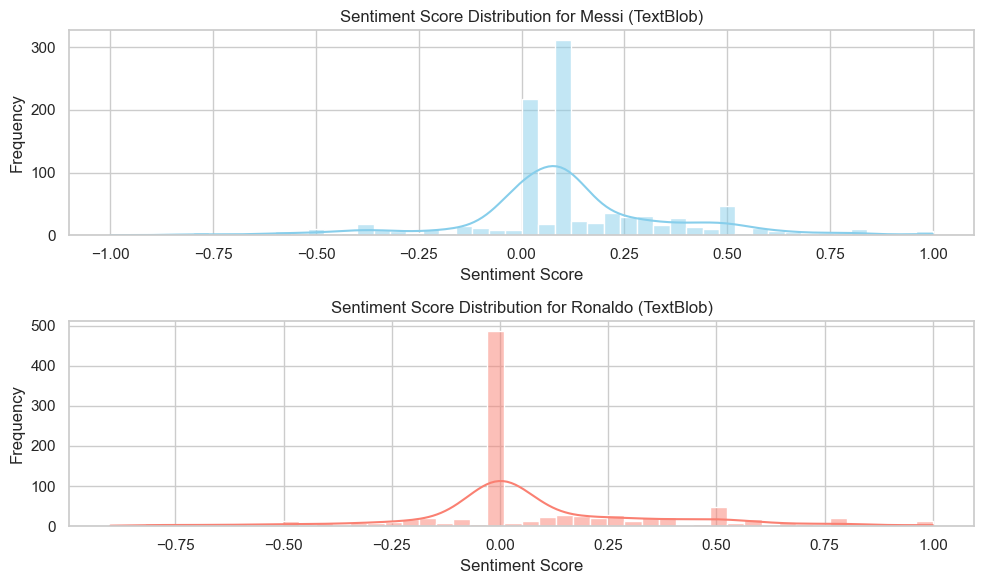

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for Messi and Ronaldo's sentiment scores using TextBlob
plt.figure(figsize=(10, 6))

# Histogram for Messi
plt.subplot(2, 1, 1)
sns.histplot(messi_df['TextBlob Sentiment Score'], kde=True, color='skyblue')
plt.title('Sentiment Score Distribution for Messi (TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for Ronaldo
plt.subplot(2, 1, 2)
sns.histplot(ronaldo_df['TextBlob Sentiment Score'], kde=True, color='salmon')
plt.title('Sentiment Score Distribution for Ronaldo (TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## BOXPLOT FOR SENTIMENT SCORES

It generates a box plot to visualize the distribution of sentiment scores for both Messi and Ronaldo using TextBlob sentiment analysis. The sentiment scores are plotted on the y-axis, while the players (Messi and Ronaldo) are plotted on the x-axis. 

The box plot provides a summary of the distribution of sentiment scores for each player, including the median (line inside the box), quartiles (edges of the box), and potential outliers (points outside the whiskers). By comparing the box plots for Messi and Ronaldo, we can gain insights into the overall sentiment distribution and any differences between the two players in terms of sentiment expressed in the comments.

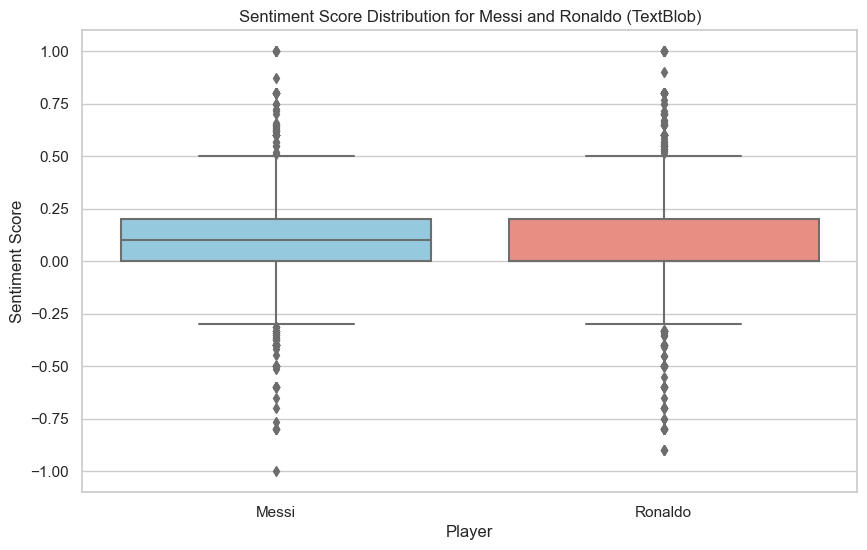

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a DataFrame for Messi and Ronaldo sentiment scores using TextBlob
sentiment_scores_df = pd.DataFrame({
    'Player': ['Messi'] * len(messi_df['TextBlob Sentiment Score']) + ['Ronaldo'] * len(ronaldo_df['TextBlob Sentiment Score']),
    'Sentiment Score': list(messi_df['TextBlob Sentiment Score']) + list(ronaldo_df['TextBlob Sentiment Score'])
})

# Plot box plots for Messi and Ronaldo sentiment scores using TextBlob
plt.figure(figsize=(10, 6))
sns.boxplot(x='Player', y='Sentiment Score', data=sentiment_scores_df, palette=["skyblue", "salmon"])
plt.title('Sentiment Score Distribution for Messi and Ronaldo (TextBlob)')
plt.xlabel('Player')
plt.ylabel('Sentiment Score')

# Show plot
plt.show()


# NAMED ENTITY RECOGNITION

This utilizes the spaCy library for Named Entity Recognition (NER) on comments related to Messi and Ronaldo. It loads the spaCy English model, defines a function to perform NER on a given text, and then applies this function to extract named entities from the comments. Finally, it prints the named entities along with their corresponding labels for both Messi and Ronaldo comments.

In [19]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform Named Entity Recognition (NER) on a given text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Perform Named Entity Recognition (NER) on Messi comments
messi_ner_results = [perform_ner(comment) for comment in messi_comments]

# Perform Named Entity Recognition (NER) on Ronaldo comments
ronaldo_ner_results = [perform_ner(comment) for comment in ronaldo_comments]

# Print NER results for Messi comments
print("Named Entities in Messi Comments:")
for comment_ner in messi_ner_results:
    for entity, label in comment_ner:
        print(f"Entity: {entity}, Label: {label}")

# Print NER results for Ronaldo comments
print("\nNamed Entities in Ronaldo Comments:")
for comment_ner in ronaldo_ner_results:
    for entity, label in comment_ner:
        print(f"Entity: {entity}, Label: {label}")


Named Entities in Messi Comments:
Entity: dulcegalia, Label: GPE
Entity: Prxyxnshu, Label: PERSON
Entity: one, Label: CARDINAL
Entity: YT, Label: ORG
Entity: Julia Alvarez, Label: PERSON
Entity: Alvarez, Label: PERSON
Entity: Croatia, Label: GPE
Entity: two, Label: CARDINAL
Entity: a World Cup, Label: EVENT
Entity: Messi, Label: PERSON
Entity: Alvarez, Label: PERSON
Entity: SpeechSea124, Label: PERSON
Entity: SpeechSea124, Label: PERSON
Entity: SpeechSea124, Label: PERSON
Entity: SpeechSea124, Label: PERSON
Entity: Suarez, Label: PERSON
Entity: CR, Label: ORG
Entity: Messi, Label: PERSON
Entity: Neymar, Mbappe, Hakimi, Label: ORG
Entity: Ramos, Label: GPE
Entity: Marquinhos, Label: GPE
Entity: Verratti, Label: ORG
Entity: Donnarumma, Label: GPE
Entity: Messi, Label: PERSON
Entity: 16, Label: CARDINAL
Entity: two consecutive seasons, Label: DATE
Entity: Messi, Label: PERSON
Entity: Messi, Label: PERSON
Entity: Messi, Label: PERSON
Entity: Ronaldo, Label: ORG
Entity: Messi, Label: PERSON

## ENTITY COUNTS DERIVED FROM NAMED ENTITY RECOGNITION (NER) IN MESSI COMMENTS

This performs Named Entity Recognition (NER) on comments related to Messi. It iterates over each comment, extracts named entities using spaCy's pre-trained English model, counts the occurrences of each entity type, and then displays the counts for each entity type found in Messi's comments.

In [20]:
 #Named Entity Recognition (NER)
messi_named_entities = []
for comment in messi_comments:
    doc = nlp(comment)
    for ent in doc.ents:
        messi_named_entities.append((ent.text, ent.label_))

# Entity Counts
entity_counts = {}
for entity, label in messi_named_entities:
    if label in entity_counts:
        entity_counts[label] += 1
    else:
        entity_counts[label] = 1

# Display the counts for each entity type
print("Entity Counts in Messi Comments:")
for entity_type, count in entity_counts.items():
    print("Entity Type:", entity_type, "- Count:", count)

Entity Counts in Messi Comments:
Entity Type: GPE - Count: 231
Entity Type: PERSON - Count: 466
Entity Type: CARDINAL - Count: 210
Entity Type: ORG - Count: 267
Entity Type: EVENT - Count: 45
Entity Type: DATE - Count: 170
Entity Type: LOC - Count: 33
Entity Type: PRODUCT - Count: 14
Entity Type: ORDINAL - Count: 41
Entity Type: FAC - Count: 4
Entity Type: PERCENT - Count: 12
Entity Type: NORP - Count: 64
Entity Type: TIME - Count: 7
Entity Type: WORK_OF_ART - Count: 6
Entity Type: LANGUAGE - Count: 4
Entity Type: LAW - Count: 2
Entity Type: QUANTITY - Count: 2
Entity Type: MONEY - Count: 2


## ENTITY COUNTS DERIVED FROM NAMED ENTITY RECOGNITION (NER) IN RONALDO COMMENTS.

This code snippet performs Named Entity Recognition (NER) on comments related to Ronaldo. It follows a similar process as the previous code for Messi, iterating over each comment, extracting named entities using spaCy's pre-trained English model, counting the occurrences of each entity type, and then displaying the counts for each entity type found in Ronaldo's comments.

In [21]:
 #Named Entity Recognition (NER)
ronaldo_named_entities = []
for comment in ronaldo_comments:
    doc = nlp(comment)
    for ent in doc.ents:
        ronaldo_named_entities.append((ent.text, ent.label_))

# Entity Counts
entity_counts = {}
for entity, label in ronaldo_named_entities:
    if label in entity_counts:
        entity_counts[label] += 1
    else:
        entity_counts[label] = 1

# Display the counts for each entity type
print("Entity Counts in ronaldo Comments:")
for entity_type, count in entity_counts.items():
    print("Entity Type:", entity_type, "- Count:", count)

Entity Counts in ronaldo Comments:
Entity Type: ORG - Count: 173
Entity Type: PERSON - Count: 398
Entity Type: DATE - Count: 87
Entity Type: NORP - Count: 31
Entity Type: ORDINAL - Count: 28
Entity Type: CARDINAL - Count: 145
Entity Type: PERCENT - Count: 5
Entity Type: GPE - Count: 210
Entity Type: EVENT - Count: 38
Entity Type: FAC - Count: 5
Entity Type: PRODUCT - Count: 15
Entity Type: MONEY - Count: 4
Entity Type: QUANTITY - Count: 4
Entity Type: WORK_OF_ART - Count: 2
Entity Type: TIME - Count: 12
Entity Type: LAW - Count: 1
Entity Type: LANGUAGE - Count: 5
Entity Type: LOC - Count: 6


Messi comments have a higher count of PERSON entities compared to Ronaldo comments, indicating more mentions of individuals related to Messi discussions.
Ronaldo comments have a higher count of GPE (Location) entities compared to Messi comments.
Both Messi and Ronaldo comments mention ORG (Organization) entities, indicating discussions about football clubs, teams, or other organizations.
Both Messi and Ronaldo comments also mention DATE entities, which could indicate discussions about specific dates or events related to football matches or tournaments.
Other entity types such as CARDINAL, NORP, EVENT, and TIME are mentioned in both Messi and Ronaldo comments, albeit with varying frequencies.

## COMPARISON OF ENTITY COUNTS BETWEEN MESSI AND RONALDO COMMENTS

This creates a comparison of entity counts between Messi and Ronaldo comments. It defines dictionaries containing the entity counts for both Messi and Ronaldo comments. Then, it creates a DataFrame from these dictionaries and plots a bar chart to visualize the comparison. The x-axis represents the entity types, while the y-axis represents the count of each entity type. Each bar represents the count of entities of a specific type in Messi and Ronaldo comments.

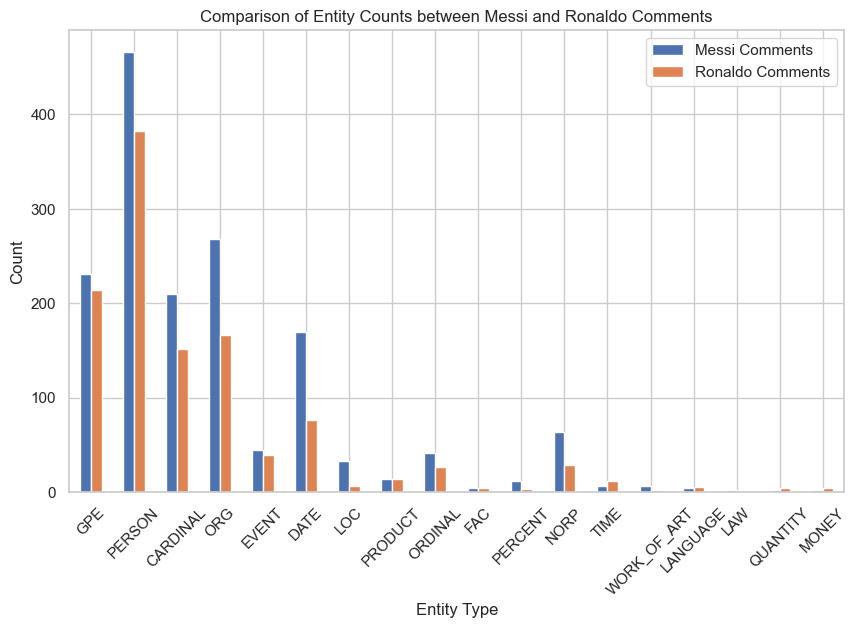

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Entity counts for Messi comments
messi_entity_counts = {
    'GPE': 231,
    'PERSON': 466,
    'CARDINAL': 210,
    'ORG': 268,
    'EVENT': 45,
    'DATE': 170,
    'LOC': 33,
    'PRODUCT': 14,
    'ORDINAL': 41,
    'FAC': 4,
    'PERCENT': 12,
    'NORP': 64,
    'TIME': 7,
    'WORK_OF_ART': 6,
    'LANGUAGE': 4,
    'LAW': 2,
    'QUANTITY': 2,
    'MONEY': 2
}

# Entity counts for Ronaldo comments
ronaldo_entity_counts = {
    'GPE': 214,
    'PERSON': 383,
    'CARDINAL': 152,
    'DATE': 76,
    'ORG': 166,
    'NORP': 29,
    'PRODUCT': 14,
    'MONEY': 4,
    'ORDINAL': 27,
    'QUANTITY': 4,
    'WORK_OF_ART': 2,
    'FAC': 4,
    'EVENT': 39,
    'TIME': 12,
    'LAW': 1,
    'LANGUAGE': 5,
    'LOC': 7,
    'PERCENT': 3
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Messi Comments': messi_entity_counts,
    'Ronaldo Comments': ronaldo_entity_counts
})

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Entity Counts between Messi and Ronaldo Comments')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#  FEATURE EXTRACTION

This performs TF-IDF feature extraction on preprocessed Messi and Ronaldo comments. It preprocesses the comments, combines them, and then uses `TfidfVectorizer` from scikit-learn to extract TF-IDF features. It prints the vocabulary size for TF-IDF representation and the shape of the feature matrix.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing for Messi comments
preprocessed_messi_comments = []

# Preprocess Messi comments
for comment in messi_df['Comment']:
    preprocessed_comment = preprocess_text(comment)  # Assuming you have a preprocess_text function
    preprocessed_messi_comments.append(preprocessed_comment)

# Preprocessing for Ronaldo comments
preprocessed_ronaldo_comments = []

# Preprocess Ronaldo comments
for comment in ronaldo_df['Comment']:
    preprocessed_comment = preprocess_text(comment)  # Assuming you have a preprocess_text function
    preprocessed_ronaldo_comments.append(preprocessed_comment)

# Combine Messi and Ronaldo comments
preprocessed_texts = preprocessed_messi_comments + preprocessed_ronaldo_comments

# Feature extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Print vocabulary size for TF-IDF representation
print("Vocabulary size (TF-IDF):", len(tfidf_vectorizer.vocabulary_))

# Print shape of feature matrix
print("TF-IDF features shape:", tfidf_features.shape)


Vocabulary size (TF-IDF): 4001
TF-IDF features shape: (1944, 4001)


# TOPIC MODELING

This performs Latent Dirichlet Allocation (LDA) topic modeling on the TF-IDF features extracted from the preprocessed Messi and Ronaldo comments. It initializes an LDA model with the specified number of topics, fits the model to the TF-IDF features, and prints the top words for each topic. The `print_top_words` function is used to display the top words for each topic based on their importance scores in the model.

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the TF-IDF features
lda_model.fit(tfidf_features)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Set the number of top words to display for each topic
n_top_words = 10

# Get feature names from the TF-IDF vectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Print top words for each topic
print("Top words per topic:")
print_top_words(lda_model, tfidf_feature_names, n_top_words)


Top words per topic:
Topic #0: goat fan ronaldo messi penaldo madrid world like never cup
Topic #1: ronaldo messi goal fact fan portugal say world think mewing
Topic #2: ronaldo nice fan messi sub pessi year shit lmao like
Topic #3: cup lol world like one messi know player time penalty
Topic #4: subreddit question please bot karma required message community moderator removed



## TOP WORDS FOR EACH TOPIC IN LDA MODEL

This visualizes the top words for each topic derived from an LDA model. It generates horizontal bar plots for each topic, where the length of the bars represents the importance of words within that topic. The plot is customized for clarity and then displayed.

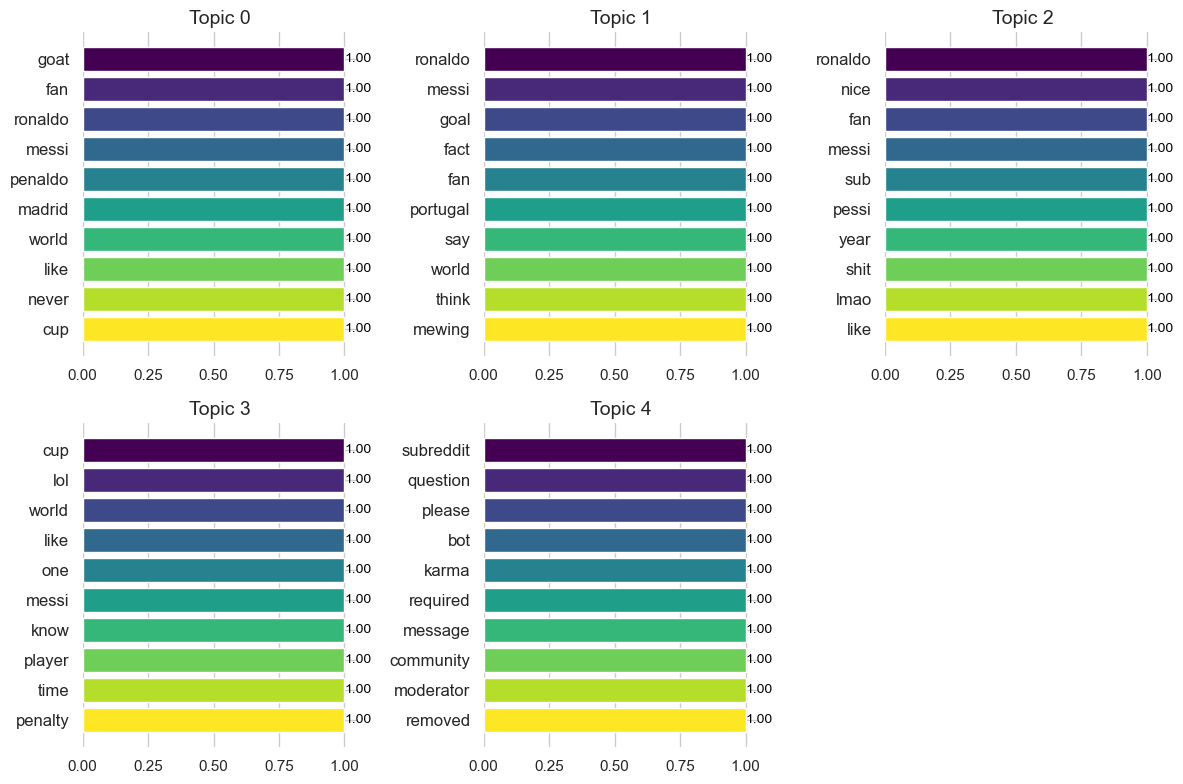

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Set the number of top words to display for each topic
n_top_words = 10

# Get top words for each topic
top_words = get_top_words(lda_model, tfidf_feature_names, n_top_words)

# Generate colors for bars
colors = plt.cm.viridis(np.linspace(0, 1, n_top_words))

# Plot the top words for each topic
plt.figure(figsize=(12, 8))
for i, topic_words in enumerate(top_words):
    plt.subplot(2, 3, i + 1)
    bars = plt.barh(np.arange(len(topic_words)), [1] * len(topic_words), color=colors)
    plt.yticks(np.arange(len(topic_words)), topic_words, fontsize=12)
    plt.title(f'Topic {i}', fontsize=14)
    plt.gca().invert_yaxis()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(left=False, bottom=False)
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
                 va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## WORDCLOUD FOR TOPIC MODELING

This generates word clouds for each topic based on the top words identified from the LDA model. Each word cloud represents the most frequent words in a topic, with the size of each word indicating its frequency. The word clouds are displayed in a grid layout for visualization.

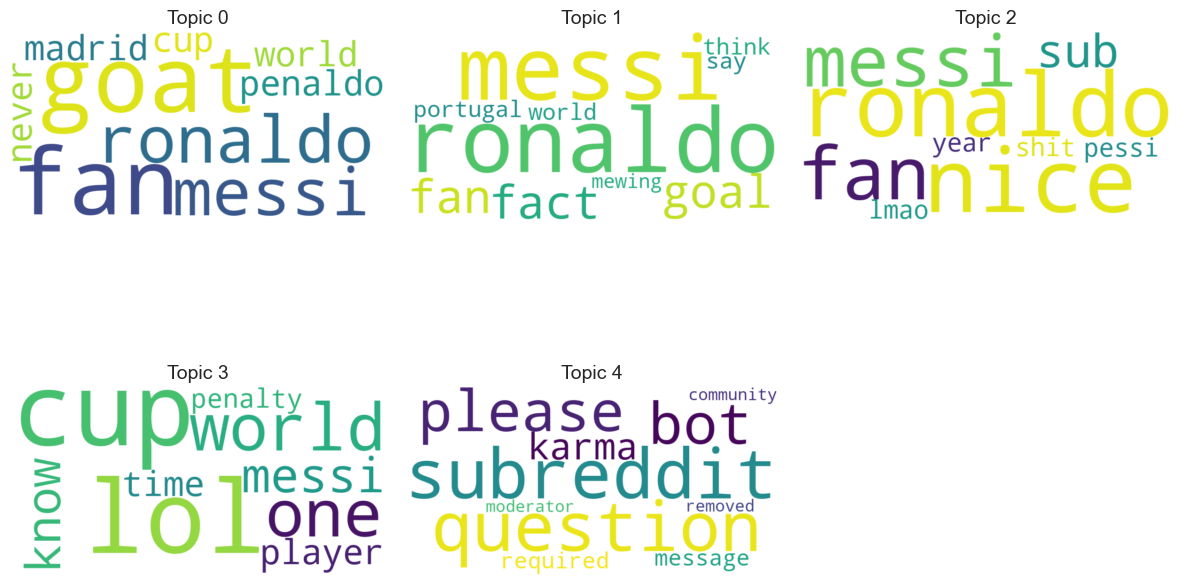

In [28]:
from wordcloud import WordCloud

# Generate word cloud for each topic
plt.figure(figsize=(12, 8))
for i, topic_words in enumerate(top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i}', fontsize=14)

plt.tight_layout()
plt.show()


# PLOT OF MESSI AND RONALDO'S GOAL CONTRIBUTIONS (2004-2023)

It reads data on Messi and Ronaldo's yearly goal contributions from a CSV file and plots their goals scored each year and cumulative total goals over the years. It uses markers for yearly goals and dashed lines for cumulative totals, with appropriate labels, a title, and legends. Grid lines are included for clarity, and the x-axis ticks are rotated for better readability.

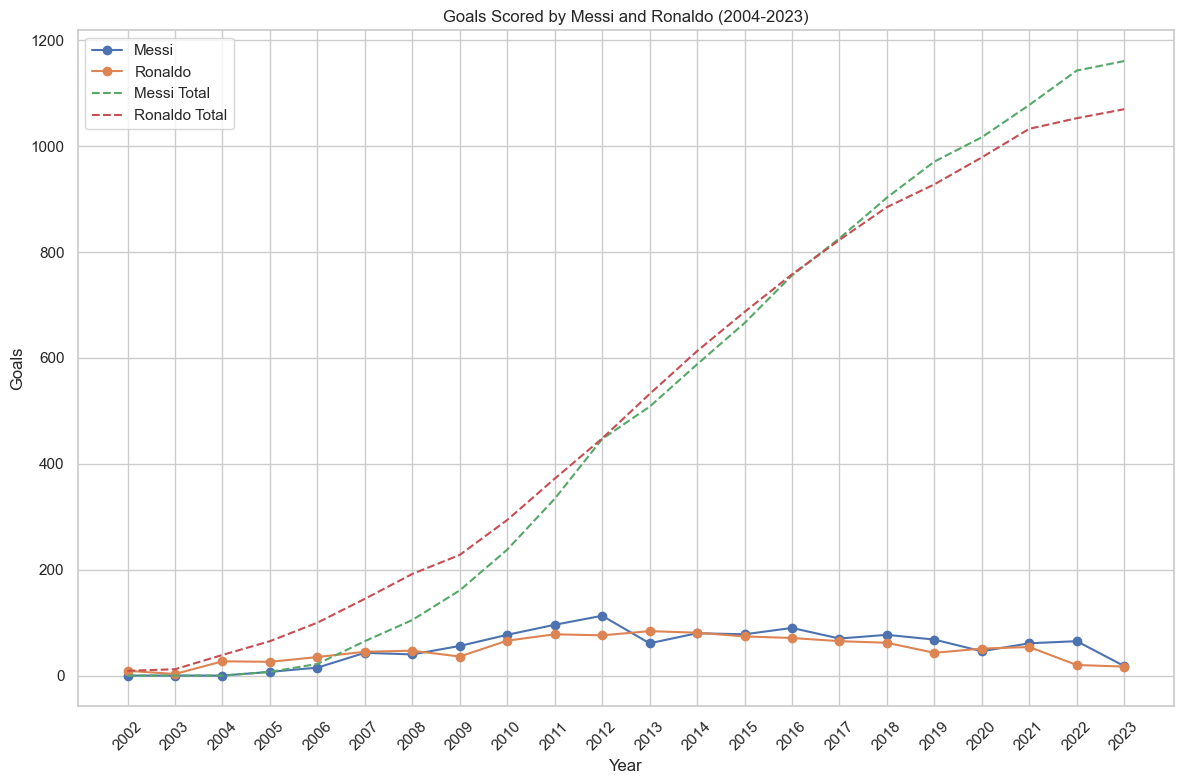

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("messivsronaldogoalcontribution.csv") 
df.head(5)
# Plotting
plt.figure(figsize=(12, 8))

# Goals scored each year
plt.plot(df['Year'], df['Messi'], marker='o', label='Messi')
plt.plot(df['Year'], df['Ronaldo'], marker='o', label='Ronaldo')

# Cumulative total goals
plt.plot(df['Year'], df['MessiTotal'], linestyle='--', label='Messi Total')
plt.plot(df['Year'], df['RonaldoTotal'], linestyle='--', label='Ronaldo Total')

# Adding labels and title
plt.title('Goals Scored by Messi and Ronaldo (2004-2023)')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(df['Year'], rotation=45)
plt.tight_layout()
plt.show()


# TOTAL GOALS SCORED BY MESSI AND RONALDO (2004-2023)

This generates a bar plot comparing the total goals scored by Messi and Ronaldo for each year from 2004 to 2023. Each bar represents the total goals scored by Messi and Ronaldo in a particular year, with Messi's bars shown in blue and Ronaldo's in red. The bars are grouped by year, with Messi's bars on the left and Ronaldo's on the right. The plot includes labels for the x-axis (Year) and y-axis (Total Goals), along with a title ("Total Goals Scored by Messi and Ronaldo (2004-2023)"). Additionally, the plot includes a legend to differentiate between Messi and Ronaldo's contributions.

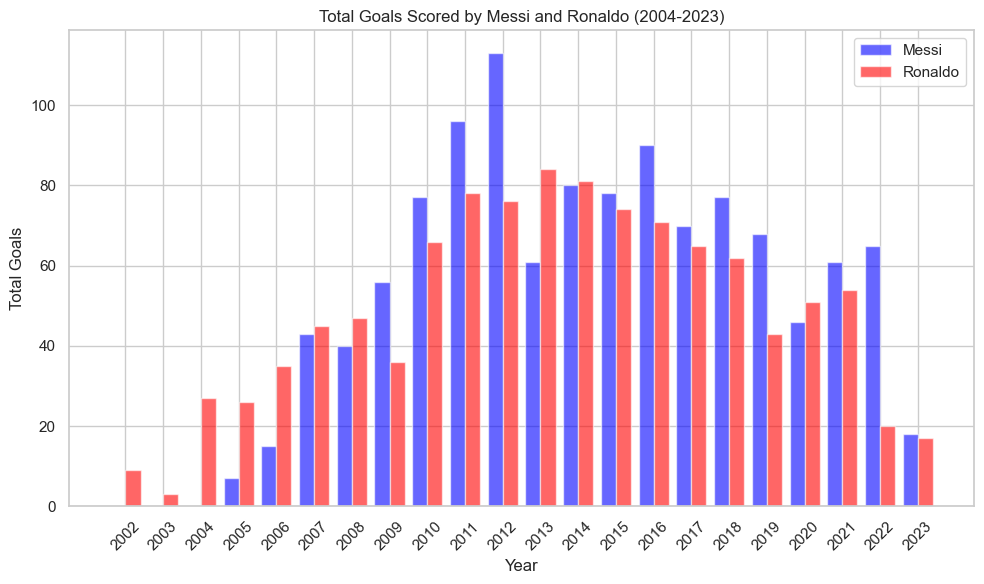

In [27]:
# Plotting
plt.figure(figsize=(10,6))

# Total goals scored each year
plt.bar(df['Year'], df['Messi'], width=0.4, align='center', label='Messi', color='blue', alpha=0.6)
plt.bar(df['Year'] + 0.4, df['Ronaldo'], width=0.4, align='center', label='Ronaldo', color='red', alpha=0.6)

# Adding labels and title
plt.title('Total Goals Scored by Messi and Ronaldo (2004-2023)')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(df['Year'] + 0.2, df['Year'], rotation=45)
plt.tight_layout()
plt.show()


# CONCLUSION

In this analysis, we explored the sentiments expressed in comments related to Lionel Messi and Cristiano Ronaldo across various online platforms. By employing a combination of sentiment analysis, topic modeling, TF-IDF, and feature extraction techniques, we gained valuable insights into the perceptions and discussions surrounding these football icons.

### SENTIMENT ANALYSIS

The sentiment analysis of comments related to Lionel Messi and Cristiano Ronaldo shows an overall positive sentiment for both players, with Messi receiving a higher total sentiment score compared to Ronaldo. The average sentiment score for Messi is 0.333, indicating predominantly positive sentiment, while for Ronaldo it is 0.110, also reflecting a positive sentiment but to a lesser extent. TextBlob sentiment analysis further supports this trend, with Messi having a slightly higher average sentiment score compared to Ronaldo.

###  TOPIC MODELING

The topic modeling analysis reveals several themes prevalent in the comments related to Messi and Ronaldo. Topics include discussions about fan rivalry ("ronaldo fan," "pessi," "goat"), participation guidelines on the subreddit ("subreddit," "karma," "moderator"), comparisons between the players ("messi," "ronaldo," "penaldo"), discussions about their performance ("world cup," "goal," "season"), and debates about their status as the greatest of all time ("goat," "best," "true"). These topics reflect the diverse range of opinions and discussions surrounding Messi and Ronaldo in online communities.

### NAMED ENTITY RECOGNITION

Feature extraction techniques such as named entity recognition and vocabulary analysis provide insights into the entities mentioned in comments and the vocabulary used by fans. In Messi comments, entities such as "GPE" (Geopolitical Entity), "PERSON," and "CARDINAL" are frequently mentioned, indicating discussions about places, individuals, and numerical counts. Ronaldo comments also mention similar entities, with a focus on "PERSON," "CARDINAL," and "GPE." The vocabulary analysis reveals common words associated with each topic, such as "ronaldo," "messi," "goal," and "fan," indicating the central themes of discussions.

### ANALYSIS OF TRENDS IN SOCIAL MEDIA FAN BASE POSITIVITY

Based on the provided data, it appears that both Messi and Ronaldo have dedicated fan bases expressing overall positive sentiment towards them. However, there are some differences in the intensity of sentiment, with Messi's fan base exhibiting slightly higher positivity compared to Ronaldo's. This trend might be influenced by recent events, performance on the field, or other factors affecting public perception.

Additionally, the topics of discussion indicate ongoing debates and conversations surrounding Messi and Ronaldo, reflecting the enduring popularity and significance of both players in the world of football. These discussions contribute to the dynamism of social media platforms, where fans engage in dialogue, express opinions, and support their favorite players. Overall, the analysis suggests that both Messi and Ronaldo continue to command substantial attention and generate diverse reactions from their fan bases on social media platforms.

In conclusion, the analysis underscores the enduring popularity and significance of Messi and Ronaldo in the world of football. Despite occasional debates and rivalries among fans, both players continue to captivate audiences and spark engaging discussions across online platforms. The findings provide valuable insights into the sentiments, topics, and trends surrounding these football legends, highlighting their profound impact on global football culture.